### Comparing chlorophull-a concentration extimates for Trocas expeditions in the Amazon mouth

- I used find and replace in LibreOffice to remove all the Portuguese accents from the Excel final, and then I saved the first tab as a `csv` so I could easily read into Python.

In [30]:
import os
os.chdir("/home/millieginty/Documents/git-repos/amazon/")

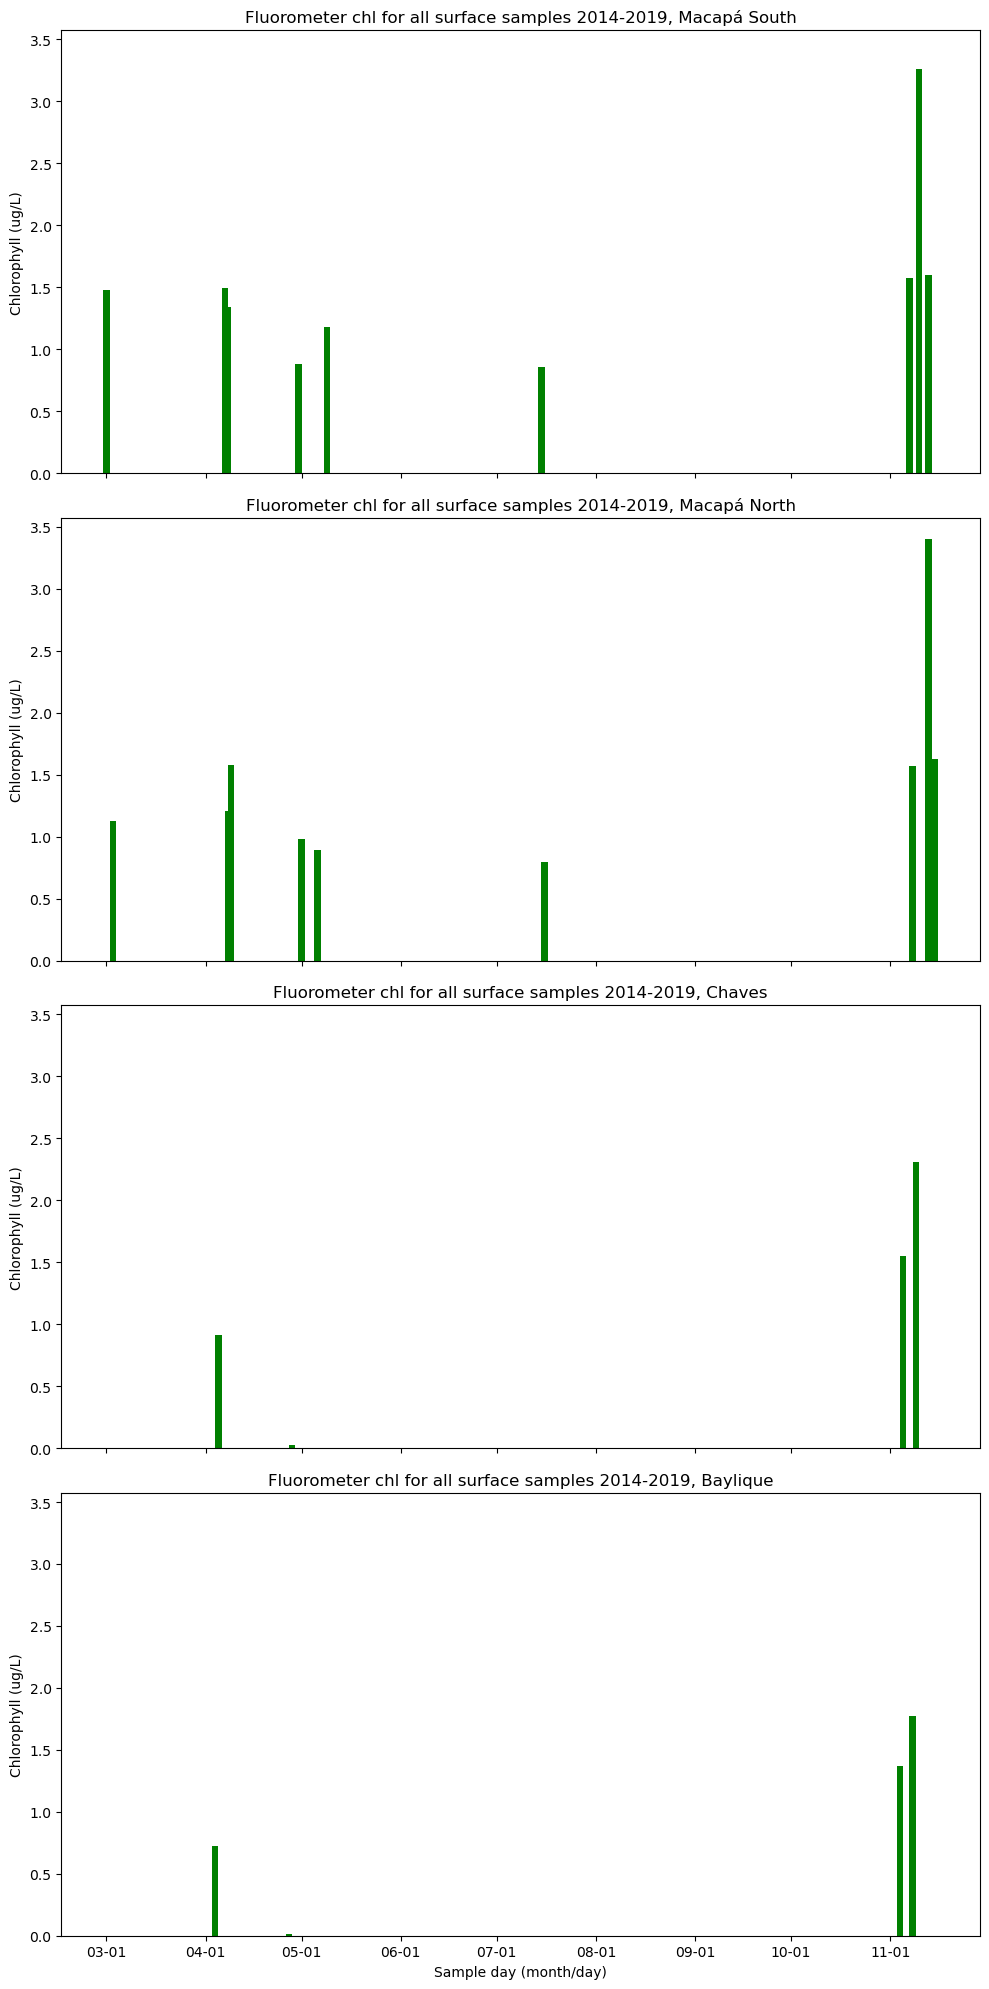

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load INPE fluorometer data sent by Aline in Dec 2023
# There's a copy of the Excel file in my manuscripts directory
fluor_data = pd.read_csv("data/chlorophyll/HPLCandFluorChlaT1toT8_super.csv")

# Convert 'DATE' column to datetime and set it as the index
fluor_data['DATE2'] = pd.to_datetime(fluor_data['DATE2'])
fluor_data.set_index('DATE2', inplace=True)

# Define the rivers to plot
rivers_to_plot = ['MS', 'MN', 'CH', 'BAI']
river_names = {'Macapa South', 'Macapa North', 'Chaves', 'Baylique'}

# Dictionary mapping river abbreviations to full names
river_names = {
    'MS': 'Macapá South',
    'MN': 'Macapá North',
    'CH': 'Chaves',
    'BAI': 'Baylique'
}

# Define the width of the bars
bar_width = 2  # Adjust as needed

# Filter data for each river and plot
fig, axs = plt.subplots(len(rivers_to_plot), figsize=(10, 20), sharex=True, sharey=True)

for i, river_abbr in enumerate(rivers_to_plot):
    river_data = fluor_data[fluor_data['RIVER2'].str.startswith(river_abbr)]
    axs[i].bar(river_data.index, river_data['CHLA-FLUOR'], color='green', width=bar_width)  # Adjust width of bars
    axs[i].set_title(f'Fluorometer chl for all surface samples 2014-2019, {river_names[river_abbr]}')
    axs[i].set_ylabel('Chlorophyll (ug/L)')
    # Format x-axis labels to display only month and day
    axs[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

plt.xlabel('Sample day (month/day)')
plt.tight_layout()
plt.show()

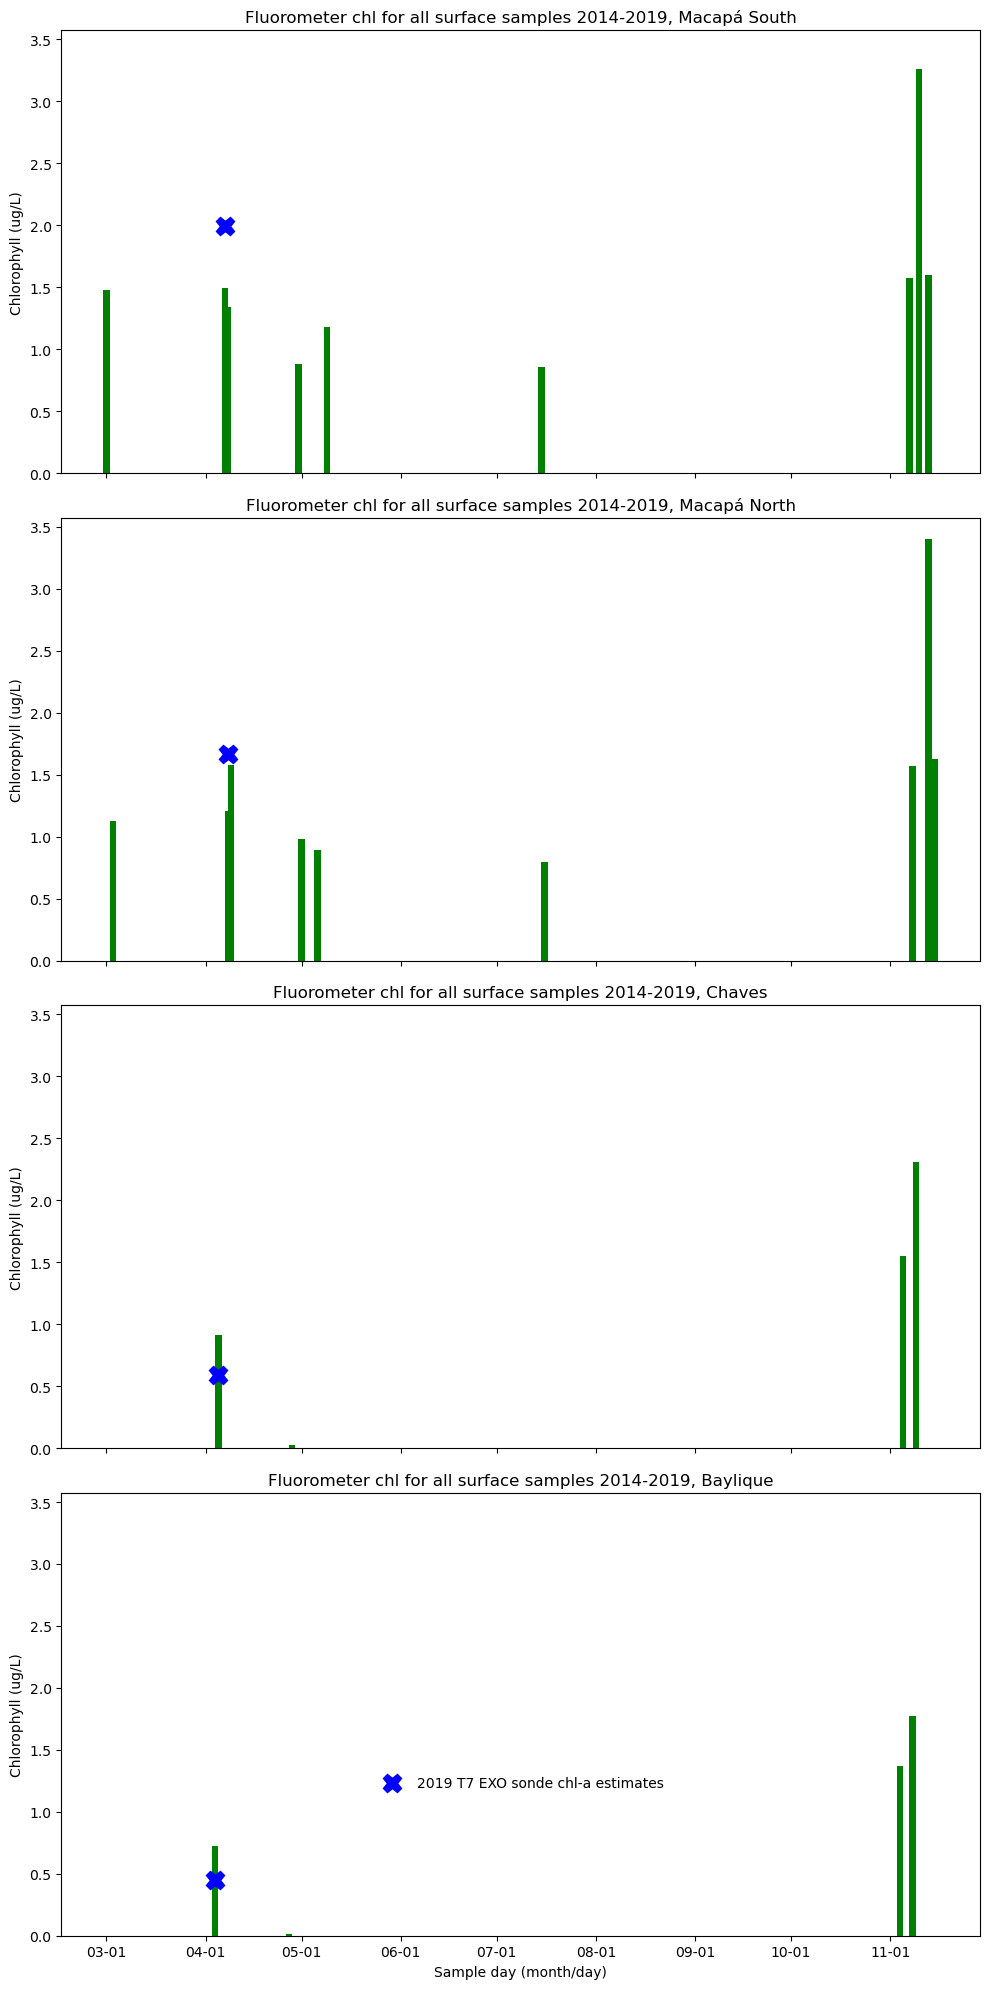

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load INPE fluorometer data sent by Aline in Dec 2023
# There's a copy of the Excel file in my manuscripts directory
fluor_data = pd.read_csv("data/chlorophyll/HPLCandFluorChlaT1toT8_super.csv")

# Convert 'DATE' column to datetime and set it as the index
fluor_data['DATE2'] = pd.to_datetime(fluor_data['DATE2'])
fluor_data.set_index('DATE2', inplace=True)

# Define the rivers to plot
rivers_to_plot = ['MS', 'MN', 'CH', 'BAI']
river_names = {'Macapa South', 'Macapa North', 'Chaves', 'Baylique'}

# Dictionary mapping river abbreviations to full names
river_names = {
    'MS': 'Macapá South',
    'MN': 'Macapá North',
    'CH': 'Chaves',
    'BAI': 'Baylique'
}

# Define the width of the bars
bar_width = 2  # Adjust as needed

# Filter data for each river and plot
fig, axs = plt.subplots(len(rivers_to_plot), figsize=(10, 20), sharex=True, sharey=True)

for i, river_abbr in enumerate(rivers_to_plot):
    river_data = fluor_data[fluor_data['RIVER2'].str.startswith(river_abbr)]
    axs[i].bar(river_data.index, river_data['CHLA-FLUOR'], color='green', width=bar_width)  # Adjust width of bars
    axs[i].plot(river_data.index, river_data['EXO-CHLA'], marker='X', linestyle='', color='blue', markersize=13, label='2019 T7 EXO sonde chl-a estimates')  # Plot circle markers for EXO-CHLA
    axs[i].set_title(f'Fluorometer chl for all surface samples 2014-2019, {river_names[river_abbr]}')
    axs[i].set_ylabel('Chlorophyll (ug/L)')
    # Format x-axis labels to display only month and day
    axs[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

# Add legend to the last subplot
axs[-1].legend(loc='lower center', bbox_to_anchor=(0.5, 0.3), ncol=1, frameon=False)

plt.xlabel('Sample day (month/day)')
plt.tight_layout()
plt.show()